# DataFrames em Economia

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo

* Estrutura dos Dados 
  * Introdução
  * DataFrames - Séries Temporais
  * DataFrames - Cross-Sectional
  * DataFrames - Dados em Painel
* Raspagem de Dados da Web (*Web Scraping*)
  * Raspagem com o Pandas
  * Raspagem/Automação com o Selenium
* APIs - Application Programming Interface
  * Introdução
  * Yahoo Finance Data
  * IBGE Data
  * WoldBank Open Data



### Referências

* Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media, 2019.
* Athey, S., & Imbens, G. (2017). "The State of Applied Econometrics: Causality and Policy Evaluation." *Journal of Economic Perspectives*.
* Mullainathan, S., & Spiess, J. (2017). "Machine Learning: An Applied Econometric Approach." *Journal of Economic Perspectives*.
* Varian, H. R. (2014). "Big Data: New Tricks for Econometrics." *Journal of Economic Perspectives*.
* **sklearn** (https://scikit-learn.org/stable/install.html)
* **statsmodels** (https://www.statsmodels.org/stable/index.html)
* **Prophet** (https://facebook.github.io/prophet/docs/quick_start.html)
* **pmdarima** (https://alkaline-ml.com/pmdarima/)
* **darts** (https://unit8co.github.io/darts/)
* **gluonts** (https://ts.gluon.ai/stable/), [tslearn](https://tslearn.readthedocs.io/en/stable/)
* **tslearn** (https://tslearn.readthedocs.io/en/stable/)


## Estrutura dos Dados

### Introdução

Em econometria e ciência de dados aplicados à economia, é fundamental compreender a estrutura dos dados que estamos analisando. A forma como os dados estão organizados influencia diretamente:

* O tipo de modelo estatístico que podemos aplicar;
* As hipóteses que podem ser testadas;
* As limitações na inferência causal.

Os três principais tipos de estrutura de dados são:

* **Séries Temporais (Time Series)**
* **Dados em Seção Cruzada (Cross-sectional)**
* **Dados em Painel (Panel Data)**

### DataFrames - Séries Temporais

**Definição**

Séries temporais são conjuntos de observações ordenadas no tempo. Em geral, os dados são univariados ou multivariados e possuem frequência temporal regular (diária, mensal, trimestral, anual etc.).

***Estrutura Típica em Python***

In [5]:
import pandas as pd
import numpy as np

# Simulação de série mensal
np.random.seed(42)
dates = pd.date_range(start='2010-01-01', periods=60, freq='M')
gdp = np.cumsum(np.random.normal(0.5, 0.3, size=60)) + 100
inflation = np.random.normal(3, 0.2, size=60)

df_ts = pd.DataFrame({
    'date': dates,
    'gdp': gdp,
    'inflation': inflation
}).set_index('date')

df_ts

,gdp,inflation
date,,
2010-01-31,100.649014,2.904165
2010-02-28,101.107535,2.962868
2010-03-31,101.801842,2.778733
2010-04-30,102.758750,2.760759
2010-05-31,103.188504,3.162505
2010-06-30,103.618263,3.271248
2010-07-31,104.592027,2.985598
2010-08-31,105.322258,3.200707
2010-09-30,105.681415,3.072327


Repare que são informações de um único indivíduo (ou unidade de análise) ao longo do tempo.

***Vizualização da Série Temporal***

* Plotando a Série Temporal `df_ts['gdp']`

Vamos utilizar o índice do dataframe como eixo x e o valor do PIB como eixo y. Para isso, utilizamos a função `plot()` do matplotlib, que é uma biblioteca de visualização de dados em Python. 



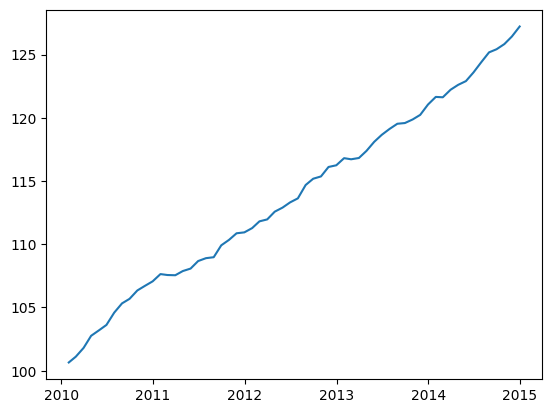

In [6]:
import matplotlib.pyplot as plt
plt.plot(df_ts.index, df_ts['gdp'])

* Plotando a série temporal `df_ts['inflation']`

Novamente, utilizamos o índice do dataframe como eixo x e o valor da inflação como eixo y. A função `plot()` do matplotlib é utilizada para criar o gráfico.

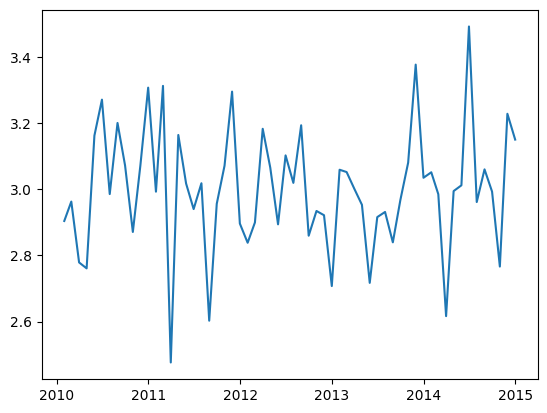

In [7]:
plt.plot(df_ts.index, df_ts['inflation'])

***Modelagem Econométrica de Séries Temporais***

Os dados de séries temporais acompanham a evolução de variáveis de um indivíduo (unidade de análise) ao longo do tempo. Por exemplo, o preço de fechamento de uma ação em cada dia do mês é uma série temporal; Ou o pib per capita de um país em cada ano.

Costuma-se modelar séries temporais como:

$$ Y_{t} = f(Y_{t-1}, Y_{t-2}, ..., Y_{t-n}) $$

Supondo que $Y_t$ seja a variável dependente, $Y_{t-1}$, $Y_{t-2}$, ..., $Y_{t-n}$ sejam as variáveis independentes e $f$ seja uma função que relaciona essas variáveis. Essa função pode ser linear ou não linear. Assumindo que a relação seja linear, podemos escrever:

$$ Y_t = \alpha + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + ... + \epsilon_t $$

repare que a variável dependente $Y_t$ possui um subscrito $t$ que indica o tempo, e a variável independente $Y_{t-1}$ possui um subscrito $t-1$ que indica o tempo anterior. Essa estrutura é típica de séries temporais, onde a variável dependente depende de seus próprios valores passados.

Para a análise dessa estrutura de base de dados, é usual o aprofundamento na teoria de séries temporais, que envolve conceitos como:

* Tendência
* Estacionariedade (ADF, KPSS)
* Sazonalidade
* Autocorrelação
* Heterocedasticidade

E a modelagem econométrica de séries temporais, que envolve a construção de modelos estatísticos para ***prever o comportamento futuro da variável e unidade de pesquisa em questão. Esses modelos podem ser univariados ou multivariados, dependendo do número de variáveis envolvidas na análise. Por exemplo:

* Modelos ARIMA (AutoRegressive Integrated Moving Average)
* Modelos SARIMA (Seasonal ARIMA)
* Modelos VAR (Vector AutoRegressive)
* Modelos VEC (Vector Error Correction)
* Modelos GARCH (Generalized Autoregressive Conditional Heteroskedasticity)
* Modelos EGARCH (Exponential GARCH)
* Modelos VECM (Vector Error Correction Model)
* Modelos VECX (Vector Error Correction with eXogenous variables)
* Modelos VECMAX (Vector Error Correction Moving Average with eXogenous variables)
* entre outros.
  
Cuidados: 
* Não permutáveis no tempo
* Necessidade de estacionariedade em muitos modelos
* Sazonalidade, autocorrelação, heterocedasticidade


Atualmente, a literatura está se desenvolvendo a partir de modelos de aprendizado de máquina para séries temporais, que buscam capturar padrões complexos e não lineares nos dados. 

Esses modelos incluem:

* Prophet (Facebook)
* Random Forest / Extra Trees
* Gradient Boosting (XGBoost, LightGBM, CatBoost)
* Support Vector Regression (SVR)
* Deep Learning para Séries Temporais
  * RNN (Recurrent Neural Networks)
  * LSTM (Long Short-Term Memory) / GRU
  * Temporal Convolutional Networks (TCN)
  * Transformer (e variantes como Informer, Autoformer)

**Algumas bibliotecas python populares para previsão de séries temporais**

| Framework	| Modelos incluídos |
|------------------|------------------|
| [sklearn](https://scikit-learn.org/stable/install.html) |	RF, GB, SVR, Regressão |
| [statsmodels](https://www.statsmodels.org/stable/index.html) |	ARIMA, SARIMA, Holt-Winters|
| [Prophet](https://facebook.github.io/prophet/docs/quick_start.html) |	Tendência + Sazonalidade + Feriados |
| [pmdarima](https://alkaline-ml.com/pmdarima/) |	Auto ARIMA |
| [darts](https://unit8co.github.io/darts/) |	Interface única para ML, DL e ARIMA |
| [gluonts](https://ts.gluon.ai/stable/), [tslearn](https://tslearn.readthedocs.io/en/stable/) | 	Deep learning para séries temporais |

### DataFrames - Cross-Sectional

***Definição***

Dados observados em **um único ponto no tempo**, abrangendo **diferentes unidades** (indivíduos, empresas, países, etc.). Muito comuns em estudos de avaliação de impacto e análise de comportamento. Ou seja, é chamado de *Cross-Section, ou "seção cruzada" porque os dados são coletados em um único ponto no tempo, mas abrangem várias unidades de análise.



***Estrutura Típica em Python***

In [10]:
df_cs = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")

# Criar a variável de resultado Y
df_cs['Y'] = df_cs['bweight']

# Criar a variável de tratamento 'Treated' com valor inicial de 0
df_cs['Treated'] = 0
# Recodificar a variável de tratamento 'Treated' para 1 se 'mbsmoke' for igual a 'smoker'
df_cs.loc[df_cs['mbsmoke'] == 'smoker', 'Treated'] = 1

df_cs

,bweight,mmarried,mhisp,fhisp,foreign,alcohol,deadkids,mage,medu,fage,...,mbsmoke,mrace,frace,prenatal,birthmonth,lbweight,fbaby,prenatal1,Y,Treated
0,3459,married,0,0,0,0,0,24,14,28,...,nonsmoker,1,1,1,12,0,No,Yes,3459,0
1,3260,notmarried,0,0,1,0,0,20,10,0,...,nonsmoker,0,0,1,7,0,No,Yes,3260,0
2,3572,married,0,0,1,0,0,22,9,30,...,nonsmoker,1,1,1,3,0,No,Yes,3572,0
3,2948,married,0,0,0,0,0,26,12,30,...,nonsmoker,1,1,1,1,0,No,Yes,2948,0
4,2410,married,0,0,0,0,0,20,12,21,...,nonsmoker,1,1,1,3,1,Yes,Yes,2410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,3317,notmarried,0,0,0,0,0,21,12,24,...,smoker,1,1,2,10,0,Yes,No,3317,1
4638,3030,married,0,0,0,1,1,30,12,23,...,smoker,1,1,2,2,0,No,No,3030,1
4639,2950,notmarried,0,0,0,0,0,23,12,0,...,nonsmoker,0,0,1,5,0,Yes,Yes,2950,0
4640,3969,married,0,0,0,0,0,23,12,25,...,nonsmoker,1,1,1,2,0,Yes,Yes,3969,0


***Vizualização de Cross-Sectional***

Vamos comparar o peso dos bebês entre gestantes fumantes e não fumantes.

<Axes: xlabel='Y', ylabel='Density'>

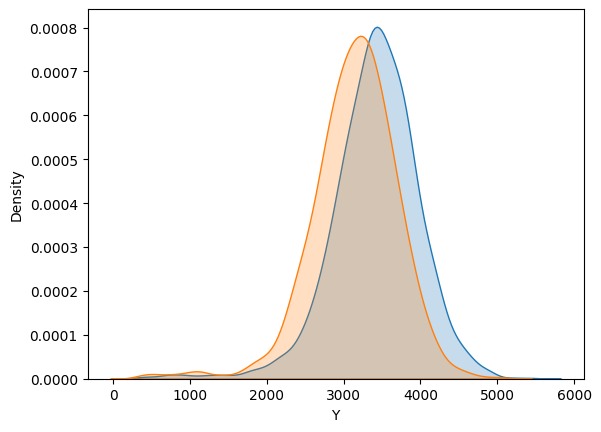

In [13]:
import seaborn as sns
sns.kdeplot(df_cs[df_cs['Treated'] == 0]['Y'], fill=True, label='Não fumantes')
sns.kdeplot(df_cs[df_cs['Treated'] == 1]['Y'], fill=True, label='Fumantes')

***Modelagem Econométrica de Dados Cross-Sectional***

Costuma-se modelar dados em seção cruzada como:

$$ Y_{i} = f(X_{i}) $$

onde $Y_{i}$ é a variável dependente, $X_{i}$ é um vetor de variáveis independentes e $f$ é uma função que relaciona essas variáveis. Essa função pode ser linear ou não linear. Assumindo que a relação seja linear, podemos escrever:

$$ Y_{i} = \alpha + \beta_1 X_{i1} + \beta_2 X_{i2} + ... + \epsilon_{i} $$

onde $X_{i1}$, $X_{i2}$, ... são as variáveis independentes e $\epsilon_{i}$ é o erro aleatório. Essa estrutura é típica de dados em seção cruzada, onde a variável dependente depende de um conjunto de variáveis independentes observadas em um único ponto no tempo.

Repare que a variável dependente $Y_{i}$ possui um subscrito $i$ que indica a unidade de análise, e as variáveis independentes $X_{i1}$, $X_{i2}$, ... também possuem subscritos $i$ que indicam a mesma unidade de análise. Essa estrutura é típica de dados em seção cruzada, onde as variáveis independentes são observadas em um único ponto no tempo para diferentes unidades de análise.

Normalmente, a modelagem econométrica de dados em seção cruzada envolve a construção de modelos estatísticos para:
* ***inferir relações causais entre variáveis e testar hipóteses***. 
  * Foco em uma relação específica entre $X_{j}$ e $Y_{i}$.
* Atenção para Heterocedasticidade
* Caso exista fonte de endogeneidade, é necessário técnicas que busquem lidar com isso. 


### DataFrames - Dados em Painel

***Definição***

Dados observados em **diferentes pontos no tempo** e abrangendo **diferentes unidades** (indivíduos, empresas, países, etc.). Ou seja, é chamado de *Painel* porque os dados são coletados em diferentes pontos no tempo para diferentes unidades de análise. Essa estrutura permite analisar a evolução de variáveis ao longo do tempo e entre diferentes unidades de análise.

Também é chamado de *Longitudinal Data* ou *Time Series Cross-Sectional Data* (TSCS). Como possui duas dimensões (tempo e unidades), quando a dimensão do tempo é maior que a dimensão das unidades, é chamado de *Long Panel Data* (Painel Longo). Quando a dimensão das unidades é maior que a dimensão do tempo, é chamado de *Short Panel Data* (Painel Curto). Nos paineis Longos as características de séries temporais são mais relevantes, enquanto nos paineis Curtos as características de seção cruzada são mais relevantes.

***Estrutura Típica em Python***

In [1]:
import pandas as pd
df_pd = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/bacon_example.dta")
df_pd

,stfips,year,_nfd,post,asmrs,pcinc,asmrh,cases,weight,copop
0,1,1964.0,1971.0,0.0,35.639885,12406.178537,5.007341,0.012312,1.715156e+06,1.715156e+06
1,1,1965.0,1971.0,0.0,41.543755,13070.206738,4.425367,0.010419,1.715156e+06,1.725186e+06
2,1,1966.0,1971.0,0.0,34.252335,13526.663217,4.874819,0.009900,1.715156e+06,1.735219e+06
3,1,1967.0,1971.0,0.0,34.465023,13918.189823,5.362014,0.009975,1.715156e+06,1.745250e+06
4,1,1968.0,1971.0,0.0,40.440105,14684.808682,4.643759,0.012401,1.715156e+06,1.755283e+06
...,...,...,...,...,...,...,...,...,...,...
1612,56,1992.0,1977.0,1.0,33.149574,31181.450546,1.970134,0.028996,1.621688e+05,2.323830e+05
1613,56,1993.0,1977.0,1.0,63.909775,31666.776231,3.020953,0.026672,1.621688e+05,2.355600e+05
1614,56,1994.0,1977.0,1.0,81.793816,31959.528356,3.501871,0.023643,1.621688e+05,2.389800e+05
1615,56,1995.0,1977.0,1.0,30.630585,32327.659531,0.740606,0.020965,1.621688e+05,2.414090e+05


A variável identificadora é `stfips`, que representa o estado, e a variável temporal é `year`, que representa o ano. 

É importante entendermos que os dados em painel costuma estar em formato "longo", ou seja, cada linha representa uma observação para uma unidade de análise em um determinado ponto no tempo. Isso significa que, para cada unidade de análise, teremos várias linhas correspondentes a diferentes períodos de tempo. Essa estrutura é fundamental para a análise de dados em painel, pois permite observar como as variáveis evoluem ao longo do tempo e entre diferentes unidades de análise.

In [3]:
n_individuos = df_pd['stfips'].nunique()
n_individuos

49

In [4]:
n_periodos = df_pd['year'].nunique()
n_periodos

33

Chamamos de ***painel balanceado*** aquele em que todas as unidades de análise possuem o mesmo número de observações. Já o painel ***não balanceado*** (desbalanceado) é aquele em que as unidades de análise possuem diferentes números de observações.

In [5]:
painel_balanceado = df_pd.groupby('stfips')['year'].nunique().nunique() == 1
painel_balanceado

True

Temos um painel balanceado, onde cada unidade de análise possui o mesmo número de observações.

***Modelagem Econométrica de Dados em Painel***

Costuma-se modelar dados em painel como:

$$ Y_{it} = f(X_{it}) $$

onde $Y_{it}$ é a variável dependente, $X_{it}$ é um vetor de variáveis independentes e $f$ é uma função que relaciona essas variáveis. Essa função pode ser linear ou não linear. Assumindo que a relação seja linear, podemos escrever:

$$ Y_{it} = \alpha + \beta_1 X_{it1} + \beta_2 X_{it2} + ... + \epsilon_{it} $$

onde $X_{it1}$, $X_{it2}$, ... são as variáveis independentes e $\epsilon_{it}$ é o erro aleatório. Essa estrutura é típica de dados em painel, onde a variável dependente depende de um conjunto de variáveis independentes observadas em diferentes pontos no tempo.

***Efeito fixo individual***

A estrutura de dados em painel é bastante importante na econometria, pois permite controlar os chamados efeitos fixos e/ou aleatórios, que são características não observadas pelo pesquisador que também podem influenciar a variável dependente. Em econometria o efeito fixo possui relevência especial porque pode ser fonte de viés de estimação. 

Por exemplo, em um estudo sobre o impacto da educação na renda, o efeito fixo pode representar características individuais não observadas, como habilidades inatas ou motivação. Modelamos o efeito fixo como uma variável independente (uma característica individual, constante no tempo), mas que não é observada diretamente. Assim, o modelo de dados em painel pode ser escrito como:

$$ Y_{it} = \beta_1 X_{it1} + \beta_2 X_{it2} + \mu_i + \epsilon_{it} $$

onde $\mu_i$ é o efeito fixo associado à unidade de análise $i$. Esses efeitos podem ser interpretados como características não observadas que afetam a variável dependente, mas que não estão incluídas no modelo. Por exemplo, em um estudo sobre o impacto da educação na renda, o efeito fixo pode representar características individuais não observadas, como habilidades inatas ou motivação.

*Observação*: a constante $\alpha$ é a média dos efeitos fixos, ou seja, $\alpha = \frac{1}{N} \sum_{i=1}^{N} \mu_i$, onde $N$ é o número de unidades de análise. Portanto, o efeito fixo individual é uma característica constante ao longo do tempo, mas que varia entre os indivíduos. Isso significa que cada indivíduo tem um efeito fixo diferente, que não pode ser observado diretamente, mas que afeta a variável dependente.

***Efeito fixo temporal***

O efeito fixo temporal é uma característica comum em dados em painel, onde a variável dependente é influenciada por fatores que variam ao longo do tempo, mas não entre os indivíduos. Esses fatores podem incluir mudanças econômicas, políticas ou sociais que afetam todos os indivíduos de maneira semelhante. O modelo de dados em painel pode ser escrito como:

$$ Y_{it} = \alpha + \beta_1 X_{it1} + \beta_2 X_{it2} + \mu_t + \epsilon_{it} $$

O efeito fixo temporal é representado por $\mu_t$, que captura as variações na variável dependente que ocorrem ao longo do tempo, mas não entre os indivíduos. Por exemplo, em um estudo sobre o impacto da educação na renda, o efeito fixo temporal pode representar mudanças econômicas que afetam todos os indivíduos de maneira semelhante, como uma recessão ou um boom econômico (ou seja, um choque comum).

***Two-way fixed effects - TWFE***

O modelo de efeitos fixos bidirecionais (two-way fixed effects) é uma extensão do modelo de efeitos fixos que considera tanto os efeitos fixos individuais quanto os efeitos fixos temporais. Esse modelo é útil quando se deseja controlar simultaneamente por características não observadas que variam entre os indivíduos e características não observadas que variam ao longo do tempo. O modelo pode ser escrito como:

$$ Y_{it} = \beta_1 X_{it1} + \beta_2 X_{it2} + \mu_i + \mu_t + \epsilon_{it} $$

onde $\mu_i$ representa os efeitos fixos individuais e $\mu_t$ representa os efeitos fixos temporais. Esse modelo é amplamente utilizado em estudos de avaliação de impacto e análise de comportamento, pois permite controlar simultaneamente por características não observadas que variam entre os indivíduos e características não observadas que variam ao longo do tempo.


## Raspagem de Dados da Web (*Web Scraping*)

### Introdução

Técnica de extração automatizada de dados de sites (conteúdo web), com o objetivo de coletar informações que não estão disponíveis em APIs (Application Programming Interfaces) ou em formatos estruturados (como CSV, JSON, etc.). Outra justificativa seria os dados que possuem atualizações contínuas, como preços de ações, taxas de câmbio, entre outros (Web crawlers).

* ***Web Scraper***: é específico, voltado para extrair dados de páginas alvo.

* ***Web crawlers***: spiders, bots ou web robots - são programas automatizados que navegam pela internet de forma sistemática, visitando páginas da web, seguindo links, e coletando informações.

Na prática, os dois podem trabalhar juntos:
* O crawler localiza as páginas,
* O scraper extrai as informações

Vamos aprender como realizar uma raspagem de dados da web utilizando a biblioteca **Pandas**, **BeautifulSoup** e **Scrapy**.
* ***BeautifulSoup***: é uma biblioteca Python para extrair dados de arquivos HTML e XML. Ela fornece métodos para navegar na árvore de análise do documento, pesquisar elementos e extrair informações de forma fácil e intuitiva.
* ***Scrapy***: é um framework de código aberto para a construção de web scrapers. Ele fornece uma estrutura robusta para a coleta de dados da web, incluindo recursos avançados como gerenciamento de solicitações, manipulação de cookies, suporte a proxies e muito mais. Scrapy é ideal para projetos maiores e mais complexos, onde você precisa coletar dados de várias páginas ou sites. Além disso, ele permite o armazenamento dos dados em vários formatos, como JSON, CSV ou bancos de dados. 
* ***pprint***: é uma biblioteca Python que fornece uma função chamada `pprint()` para imprimir objetos Python de forma legível e formatada. É especialmente útil para exibir estruturas de dados complexas, como listas, dicionários e objetos aninhados, de maneira mais compreensível. A função `pprint()` formata a saída com recuos e quebras de linha apropriadas, facilitando a leitura e a compreensão dos dados.
* ***selenium***: é uma biblioteca Python que permite automatizar navegadores da web. É amplamente utilizada para testes automatizados de aplicativos da web, mas também pode ser usada para raspagem de dados em sites dinâmicos que dependem de JavaScript para carregar conteúdo. O Selenium simula a interação do usuário com o navegador, permitindo que você navegue por páginas, clique em botões, preencha formulários e colete dados de maneira programática.
* ***requests***: é uma biblioteca Python que facilita o envio de solicitações HTTP e a manipulação de respostas. Ela simplifica o processo de fazer requisições a servidores web, permitindo que você obtenha dados de páginas da web, APIs e outros recursos online. A biblioteca `requests` é amplamente utilizada para raspagem de dados, integração com APIs e qualquer tarefa que envolva comunicação com servidores via HTTP.

### Raspagem com o Pandas

Vejamos uma forma de coletar as informações em tabelas de modo simples.

Fiz uma pesquisa sobre "PIB nominal per capita" no Google e encontrei o seguinte site: 
* https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_PIB_nominal_per_capita

Ao abrir o site, ele mostra algumas imagens e tabelas com dados sobre o PIB nominal per capita de vários países. O site possui uma formatação HTML. A tabela é uma estrutura de dados tabular que pode ser facilmente manipulada e analisada. Para coletar os dados dessa tabela, podemos carregá-la em um DataFrame do Pandas (de html para DataFrame). Ao carregá-la, podemos manipulá-la e analisá-la como quisermos.

**Rotina no Python**

In [6]:
import pandas as pd

In [7]:
# Raspagem das tabelas do Wikipedia
url = 'https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_PIB_nominal_per_capita'
df_list = pd.read_html(url)

# Checando o número de tabelas encontradas
print(len(df_list))

12


Temos 12 tabelas. Verificando o tamanho de cada tabela:

In [8]:
for df in df_list: print(df.shape)

(1, 2)
(1, 3)
(609, 3)
(192, 3)
(196, 3)
(216, 3)
(6, 2)
(10, 3)
(3, 2)
(4, 2)
(16, 2)
(5, 2)


Vamos olhar o conteúdo de cada uma delas.

In [13]:
# Verificando a primeira tabela
df_list[0].head()

,0,1
0,NaN,Este artigo ou seção pode conter informações d...


In [14]:
# Verificando a segunda tabela
df_list[1].head()

,0,1,2
0,">$60,000 $50,000 - $60,000 $40,000 - $50,000 $...","$20,000 - $30,000 $10,000 - $20,000 $5,000 - $...","$1,000 - $2,500 $500 - $1,000 <$500 Sem dados"


In [15]:
# Verificando a terceira tabela
df_list[2].head(10)

,0,1,2
0,Fundo Monetário Internacional (2024)[3],Banco Mundial (2019)[4],Nações Unidas (2018)[5]
1,Posição País/Território US$ 1 Luxemburgo 131....,Posição País/Território US$ 1 Mónaco[6] 190.5...,Posição País/Território US$ 1 Mónaco 185.835 ...
2,Posição,País/Território,US$
3,1,Luxemburgo,131.384
4,2,Irlanda,106.059
5,3,Suíça,105.669
6,4,Noruega,94.660
7,5,Singapura,88.447
8,6,Estados Unidos,85.373
9,7,Islândia,84.594


In [16]:
# Verificando a quarta tabela
df_list[3].head(10)

,Posição,País/Território,US$
0,1,Luxemburgo,131.384
1,2,Irlanda,106.059
2,3,Suíça,105.669
3,4,Noruega,94.660
4,5,Singapura,88.447
5,6,Estados Unidos,85.373
6,7,Islândia,84.594
7,8,Catar,81.400
8,—,Macau,78.962
9,9,Dinamarca,68.898


In [17]:
# Verificando a quinta tabela
df_list[4].head(10)

,Posição,País/Território,US$
0,1,Mónaco[6],190.512
1,2,Liechtenstein (2018)[6],180.366
2,3,Luxemburgo,114.705
3,—,Macau,84.096
4,4,Suíça,81.994
5,5,Irlanda,78.661
6,6,Noruega,75.420
7,7,Islândia,66.945
8,8,Estados Unidos,65.281
9,9,Singapura,65.233


In [18]:
# Verificando a sexta tabela
df_list[5].head(10)

,Posição,País/Território,US$
0,1,Mónaco,185.835
1,2,Liechtenstein,179.258
2,3,Luxemburgo,117.370
3,4,Bermudas,101.208
4,5,Macau,86.355
5,6,Ilhas Caimã,85.474
6,4,Suíça,82.709
7,5,Noruega,81.336
8,6,Irlanda,79.415
9,7,Islândia,76.867


As 3 tabelas que queríamos raspar são: `df_list[3]`, `df_list[4]` e `df_list[5]`.

In [19]:
tabela1 = df_list[3]
tabela2 = df_list[4]
tabela3 = df_list[5]

In [20]:
tabela1

,Posição,País/Território,US$
0,1,Luxemburgo,131.384
1,2,Irlanda,106.059
2,3,Suíça,105.669
3,4,Noruega,94.660
4,5,Singapura,88.447
...,...,...,...
187,181,Iêmen,486.000
188,182,Malawi,481.000
189,183,Afeganistão,422.000
190,183,Sudão do Sul,422.000


In [21]:
tabela2

,Posição,País/Território,US$
0,1,Mónaco[6],190.512
1,2,Liechtenstein (2018)[6],180.366
2,3,Luxemburgo,114.705
3,—,Macau,84.096
4,4,Suíça,81.994
...,...,...,...
191,185,Moçambique,492.000
192,186,República Centro-Africana,468.000
193,187,Sudão,442.000
194,188,Malawi,412.000


In [22]:
tabela3

,Posição,País/Território,US$
0,1,Mónaco,185.835
1,2,Liechtenstein,179.258
2,3,Luxemburgo,117.370
3,4,Bermudas,101.208
4,5,Macau,86.355
...,...,...,...
211,189,República Centro-Africana,481.000
212,190,Libéria,440.000
213,191,Malawi,397.000
214,192,Burundi,294.000


**Limpeza**

Primeiramente vamos ajustar os nomes das colunas de cada tabela para que o pib per capita em US Dólar sejá vinculado à fonte de dados específica.


In [23]:
tabela1.rename(columns={'US$': 'US$_FMI'}, inplace=True)
tabela2.rename(columns={'US$': 'US$_WB'}, inplace=True)
tabela3.rename(columns={'US$': 'US$_UN'}, inplace=True)

Repare que na tabela2, temos Mónaco[6], e precisamos retirar o termo `[6]`. Para isso, podemos usar a função `str.replace()` do Pandas. Como já sabemos, essa função substitui uma substring por outra em uma string. No caso, vamos substituir o `[6]` por vazio (ou seja, vamos removê-lo do string).

In [24]:
tabela2['País/Território'] = tabela2['País/Território'].str.replace(r'\s*\[.*?\]', '', regex=True)  # Remove colchetes

Significado de `r'\s*\[.*?\]'`:
* `r'...'`: O prefixo r significa "raw string" em Python. Isso diz ao interpretador para não escapar os caracteres especiais, ou seja, \n, \t, \[ etc. serão interpretados literalmente como \n, \t, \[, e não como nova linha, tabulação, etc.
* `\s*`: `\s` representa qualquer caractere de espaço em branco, como espaço, tabulação, nova linha. `*` significa "zero ou mais vezes". Isso pega espaços antes do colchete, se existirem.
* `\[` O colchete esquerdo `[` é um caractere especial em regex, então você precisa escapar com `\` logo `\[`.
* `.*?`: `.` Significa qualquer caractere (exceto nova linha). `*?` é uma forma não gananciosa (lazy) de dizer "repita qualquer caractere zero ou mais vezes", mas pare assim que encontrar o próximo `]`.
* `\]`: Fecha o padrão com o colchete direito, escapado: `\]`.

In [26]:
tabela2

,Posição,País/Território,US$_WB
0,1,Mónaco,190.512
1,2,Liechtenstein (2018),180.366
2,3,Luxemburgo,114.705
3,—,Macau,84.096
4,4,Suíça,81.994
...,...,...,...
191,185,Moçambique,492.000
192,186,República Centro-Africana,468.000
193,187,Sudão,442.000
194,188,Malawi,412.000


Agora, vamos retirar os números entre parênteses, como em "Liechtenstein (2018)", queremos retirar o (2018). Para isso, podemos usar a função `str.replace()` novamente, mas agora com uma expressão regular diferente. A expressão regular `r'\s*\(.*?\)'` vai encontrar qualquer número entre parênteses e substituí-lo por nada.

In [27]:
tabela2['País/Território'] = tabela2['País/Território'].str.replace(r'\s*\(.*?\)', '', regex=True)  # Remove parênteses

In [28]:
tabela2

,Posição,País/Território,US$_WB
0,1,Mónaco,190.512
1,2,Liechtenstein,180.366
2,3,Luxemburgo,114.705
3,—,Macau,84.096
4,4,Suíça,81.994
...,...,...,...
191,185,Moçambique,492.000
192,186,República Centro-Africana,468.000
193,187,Sudão,442.000
194,188,Malawi,412.000


Vamos aplicar esses códigos para todas as tabelas.

In [29]:
tabela1['País/Território'] = tabela1['País/Território'].str.replace(r'\s*\(.*?\)', '', regex=True)  # Remove parênteses
tabela1['País/Território'] = tabela1['País/Território'].str.replace(r'\s*\[.*?\]', '', regex=True)  # Remove colchetes

In [30]:
tabela3['País/Território'] = tabela3['País/Território'].str.replace(r'\s*\(.*?\)', '', regex=True)  # Remove parênteses
tabela3['País/Território'] = tabela3['País/Território'].str.replace(r'\s*\[.*?\]', '', regex=True)  # Remove colchetes

**Criação de variável identificadora para os países**

Lembre que para juntarmos os bancos de dados em um único dataframe precisamos de uma variável identificadora. Para isso, vamos criar uma variável chamada `id` que será o código do país. Essa variável vai ser criada a partir da coluna `País/Território` de cada tabela.

**Passo 1:** Vamos empilhar a coluna dos nomes dos países `['País/Território']` em uma nova variável:

In [31]:
paises = pd.concat([tabela1['País/Território'], tabela2['País/Território'], tabela3['País/Território']], ignore_index=True)

vejamos o que temos:

In [32]:
paises

0                     Luxemburgo
1                        Irlanda
2                          Suíça
3                        Noruega
4                      Singapura
                 ...            
599    República Centro-Africana
600                      Libéria
601                       Malawi
602                      Burundi
603                      Somália
Name: País/Território, Length: 604, dtype: object

conseguimos empilhar as colunas das três tabelas, vamos ordenar os dados (repare que temos 604 países descritos na lista).

Agora vamos instalar `unidecode` para retirar os acentos dos nomes dos países (pode acontecer de existir acento em um banco, e noutro não). Para isso, execute o seguinte comando no terminal do Jupyter Notebook:

`!pip install unidecode`

Depois de instalado, podemos ordenar essa nova base para verificarmos se existem países repetidos. Para isso, vamos usar a função `sort_values()` do Pandas.

In [33]:
from unidecode import unidecode

# Ordenar dataframe ignorando acentos
paises = paises.sort_values(key=lambda x: x.apply(unidecode)).reset_index(drop=True)
paises

0        Afeganistão
1        Afeganistão
2        Afeganistão
3             África
4      África do Sul
           ...      
599           Zâmbia
600           Zâmbia
601         Zimbabwe
602         Zimbabwe
603         Zimbabwe
Name: País/Território, Length: 604, dtype: object

Agora, vamos aplicar a função `drop_duplicates()` para remover os duplicados. Assim, teremos uma ***lista de países únicos*** que podemos usar como identificador.

In [34]:
paises = paises.drop_duplicates().reset_index(drop=True)

In [35]:
paises

0        Afeganistão
1             África
2      África do Sul
3            Albânia
4           Alemanha
           ...      
214          Vanuatu
215        Venezuela
216         Vietname
217           Zâmbia
218         Zimbabwe
Name: País/Território, Length: 219, dtype: object

Certo, conseguimos uma lista com todos os países possíveis. Agora, vamos reorganizar o objeto `paises` em forma de DataFrame, com uma única coluna chamada 'País/Território', removendo o índice antigo. 

In [36]:
paises = pd.DataFrame({'País/Território': paises.reset_index(drop=True)})

Agora vamos criar uma variável identificadora para cada país. Para isso, vamos apenas criar uma nova coluna `ID`, que será uma contagem de 1 em diante.

In [37]:
paises['ID'] = range(1, len(paises) + 1)

In [38]:
paises

,País/Território,ID
0,Afeganistão,1
1,África,2
2,África do Sul,3
3,Albânia,4
4,Alemanha,5
...,...,...
214,Vanuatu,215
215,Venezuela,216
216,Vietname,217
217,Zâmbia,218


Vamos juntar esse identificador em todas as tabelas utilizando 'País/Território' como chave.

In [40]:
tabela1 = tabela1.merge(paises, on='País/Território', how='left')
tabela2 = tabela2.merge(paises, on='País/Território', how='left')
tabela3 = tabela3.merge(paises, on='País/Território', how='left')

Repare que foi adicionada a coluno `ID` em cada tabela.


In [41]:
tabela1

,Posição,País/Território,US$_FMI,ID
0,1,Luxemburgo,131.384,126
1,2,Irlanda,106.059,108
2,3,Suíça,105.669,195
3,4,Noruega,94.660,152
4,5,Singapura,88.447,188
...,...,...,...,...
187,181,Iêmen,486.000,97
188,182,Malawi,481.000,131
189,183,Afeganistão,422.000,1
190,183,Sudão do Sul,422.000,193


In [42]:
# verificar o numero de linhas nulas em tabela1['ID]
tabela1['ID'].isnull().sum()


0

Nenhum país ficou sem um identificador.

In [43]:
tabela2

,Posição,País/Território,US$_WB,ID
0,1,Mónaco,190.512,140
1,2,Liechtenstein,180.366,124
2,3,Luxemburgo,114.705,126
3,—,Macau,84.096,127
4,4,Suíça,81.994,195
...,...,...,...,...
191,185,Moçambique,492.000,138
192,186,República Centro-Africana,468.000,171
193,187,Sudão,442.000,192
194,188,Malawi,412.000,131


In [44]:
tabela2['ID'].isnull().sum()

0

In [45]:
tabela3

,Posição,País/Território,US$_UN,ID
0,1,Mónaco,185.835,140
1,2,Liechtenstein,179.258,124
2,3,Luxemburgo,117.370,126
3,4,Bermudas,101.208,28
4,5,Macau,86.355,127
...,...,...,...,...
211,189,República Centro-Africana,481.000,171
212,190,Libéria,440.000,122
213,191,Malawi,397.000,131
214,192,Burundi,294.000,37


In [46]:
tabela3['ID'].isnull().sum()

0

Agora temos o mesmo identificador para todas as tabelas. Vamos juntar os dados em um único dataframe.

In [47]:
# Agora temos o mesmo identificador para todas as tabelas. Vamos juntar os dados em um único dataframe, queremos começar com a tabela 3 que possui mais dados
df = tabela3[['ID', 'País/Território', 'US$_UN']].copy()
# Merge com a tabela 2
df = df.merge(tabela2[['ID', 'US$_WB']], on='ID', how='left')
# Merge com a tabela 1
df = df.merge(tabela1[['ID', 'US$_FMI']], on='ID', how='left')
df


,ID,País/Território,US$_UN,US$_WB,US$_FMI
0,140,Mónaco,185.835,190.512,NaN
1,124,Liechtenstein,179.258,180.366,NaN
2,126,Luxemburgo,117.370,114.705,131.384
3,28,Bermudas,101.208,NaN,NaN
4,127,Macau,86.355,84.096,78.962
...,...,...,...,...,...
211,171,República Centro-Africana,481.000,468.000,538.000
212,122,Libéria,440.000,622.000,855.000
213,131,Malawi,397.000,412.000,481.000
214,37,Burundi,294.000,261.000,230.000


Ótimo, esse processo é importante para preparação de dados em econometria e machine learning. Agora temos um dataframe com os dados de PIB nominal per capita de vários países, com uma variável identificadora única para cada país. Podemos usar esse dataframe para realizar análises e modelagens econométricas.

### Raspagem/Automação com o Selenium

**Selenium** é uma biblioteca Python que permite **automatizar navegadores da web**. É amplamente utilizada para testes automatizados de aplicativos da web, mas também pode ser usada para raspagem de dados em sites dinâmicos que dependem de JavaScript para carregar conteúdo. O Selenium simula a interação do usuário com o navegador, permitindo que você navegue por páginas, clique em botões, preencha formulários e colete dados de maneira programática.

Requisitos:
* Instalar o Selenium: `pip install selenium`
* Baixar o web-driver (ChromeDriver ou GeckoDriver) correspondente ao navegador que você deseja automatizar. 
  * ChromeDriver é usado para o Google Chrome.
  * GeckoDriver é usado para o Firefox. 

Já temos o Selenium instalado, agora é o momento de instalar o ChromeDriver. Vamos fazer isso internamente no Jupyter Notebook. Para isso, vamos usar o `webdriver-manager`, que é uma biblioteca que facilita o download e a configuração do ChromeDriver.

`!pip install webdriver-manager`

Depois de instalar o `webdriver-manager`, podemos importar a biblioteca e usar o ChromeDriver. O código abaixo mostra como fazer isso:


In [48]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument("--headless")  # (opcional) roda sem abrir o navegador

# Usa o webdriver-manager para baixar automaticamente o driver compatível com sua versão do Chrome
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)


Certo, agora está instalado.

Vamos verificar se funcionou:

In [49]:
driver.get("https://www.google.com")
print(driver.title)
driver.quit()


Google


Isso confirma que o Selenium está funcionando corretamente.

Essas configurações são necessários apenas na primeira vez que você executar o código. Depois disso, o Selenium deve funcionar normalmente, sem precisar baixar o ChromeDriver novamente.

Vamos construir um exemplo simples de automação/raspagem de dados com o Selenium.

* Dados abertos da Receita Federal do Brasil: 
  * "https://www.gov.br/receitafederal/pt-br/acesso-a-informacao/dados-abertos/receitadata/arrecadacao/copy_of_arrecadacao-das-receitas-administradas-pela-rfb-por-municipio"

processo de ***automação/raspagem de dados web com o Selenium***:
1. Abrir o navegador Chrome.
2. Entrar no site da Receita Federal do Brasil.
3. Em "Receitas Administradas pela RFB", clicar no botão "Excel" para baixar o arquivo em Excel do período 2005 à 2017.


olha o que acontece:

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

navegador = webdriver.Chrome()

Não feche a janela. 

Agora vamos adicionar um comando para navegar até uma página específica

In [54]:
navegador.get('https://www.gov.br/receitafederal/pt-br/acesso-a-informacao/dados-abertos/receitadata/arrecadacao/copy_of_arrecadacao-das-receitas-administradas-pela-rfb-por-municipio')

Temos que clicar no botão "Excel" para baixar o arquivo em Excel do período 2005 à 2017. Para isso, precisamos encontrar o elemento HTML correspondente ao botão e clicar nele. O Selenium permite fazer isso usando seletores CSS ou **XPath** (caminho de códigos).

Para achar o XPath do botão "Excel", podemos usar o Chrome DevTools. Para isso, siga os passos abaixo:
* Vamos entrar na página e clicar com o botão direito em qualquer lugar da página.
* Clique em "Inspecionar" ou pressione `Ctrl + Shift + I` (Windows) ou `Cmd + Option + I` (Mac).
* Selecione o ícone de seleção (seta) no canto superior esquerdo do DevTools.
* Clique no botão "Excel" na página.
* No DevTools, você verá o código HTML correspondente ao botão "Excel" destacado. 
* Clique com o botão direito no código e selecione "Copy" > "Copy XPath". Isso copiará o XPath do botão para a área de transferência.

Por fim, vamos colar o XPath no código do Selenium para clicar no botão "Excel":

In [57]:
from selenium.webdriver.common.by import By

navegador.find_element(By.XPATH, '//*[@id="ae554d1500ec47989aa1163a11525b2f"]/div/table/tbody/tr[1]/th/a').click()


O arquivo foi baixado. No meu caso na pasta "Downloads" (C:\Users\danie\Downloads).

Depois disso, você pode usar o Pandas para ler o arquivo Excel e manipulá-lo como quiser.

## APIs - Application Programming Interface

### Introdução

APIs (Application Programming Interfaces) são conjuntos de regras e protocolos que permitem a comunicação entre diferentes sistemas, aplicativos ou serviços. Elas definem como os desenvolvedores podem interagir com um software ou serviço, permitindo que diferentes partes de um sistema se comuniquem e compartilhem dados de forma eficiente.


***World Bank Open Data***

`wbdata` é uma API que fornece acesso a dados econômicos, sociais e ambientais de países em todo o mundo. A API permite que os desenvolvedores acessem dados de indicadores, séries temporais e outros conjuntos de dados disponíveis no Banco Mundial. Os dados podem ser baixados em vários formatos, como CSV, JSON e XML.

* `!pip install wbdata`
* `!pip install --upgrade wbdata`


* URL: https://data.worldbank.org/indicator

In [93]:
import wbdata
import pandas as pd
import datetime

# Define intervalo de datas como datetime
inicio = datetime.datetime(2000, 1, 1)
fim = datetime.datetime(2023, 1, 1)

# Indicador: PIB per capita (US$ constantes de 2015)
indicador = {"NY.GDP.PCAP.KD": "PIB_per_capita"}

# Chamada correta usando 'date' em vez de 'data_date'
df = wbdata.get_dataframe(indicator,
                          country="BRA",
                          date=(inicio, fim),
                          convert_date=True)

# Exibir os primeiros registros
print(df.head())



TypeError: got an unexpected keyword argument 'convert_date'